In [40]:
import pandas as pd
import warnings
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

warnings.filterwarnings("ignore")

!pip install kaggle

cred = {"username":"akmalariq9","key":"226c6c52a4e488b79657373a7aeedfd3"}

!mkdir ~/.kaggle/
!touch ~/.kaggle/kaggle.json

import json
api_token = cred

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d syedanwarafridi/vehicle-sales-data

!unzip vehicle-sales-data.zip

mkdir: cannot create directory ‘/root/.kaggle/’: File exists
vehicle-sales-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  vehicle-sales-data.zip
replace car_prices.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: car_prices.csv          


In [41]:
df = pd.read_csv('/content/car_prices.csv')
df_numeric = df.drop(['make', 'model', 'trim', 'body', 'state', 'color', 'interior', 'seller', 'vin', 'saledate'], axis=1)
df_numeric.head()


,year,transmission,condition,odometer,mmr,sellingprice
0,2015,automatic,5.0,16639.0,20500.0,21500.0
1,2015,automatic,5.0,9393.0,20800.0,21500.0
2,2014,automatic,45.0,1331.0,31900.0,30000.0
3,2015,automatic,41.0,14282.0,27500.0,27750.0
4,2014,automatic,43.0,2641.0,66000.0,67000.0


In [42]:
df_clean = df_numeric.dropna()

df_clean.isna().sum()

year            0
transmission    0
condition       0
odometer        0
mmr             0
sellingprice    0
dtype: int64

In [43]:
df_clean = df_clean.drop(df_clean[(df_clean['transmission'].isnull()) | (df_clean['transmission'].str.lower() == 'sedan')].index)

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 483514 entries, 0 to 558836
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          483514 non-null  int64  
 1   transmission  483514 non-null  object 
 2   condition     483514 non-null  float64
 3   odometer      483514 non-null  float64
 4   mmr           483514 non-null  float64
 5   sellingprice  483514 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 25.8+ MB


In [45]:
df_clean['transmission'] = df_clean['transmission'].replace({'manual': 0, 'automatic': 1})

In [46]:
df_clean = df_clean.sample(1000)

In [47]:
from sklearn.preprocessing import StandardScaler

X = df_clean.values[:, :]
X = np.nan_to_num(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

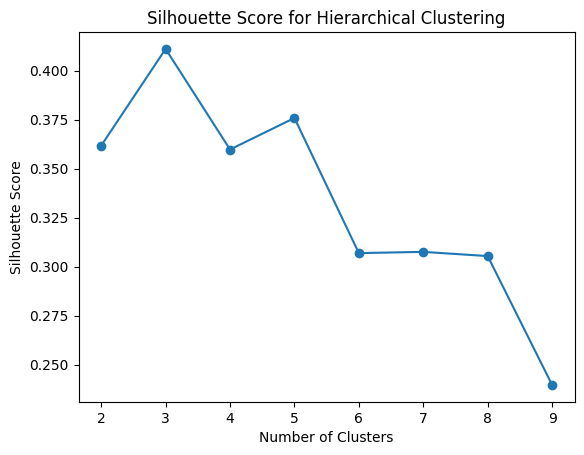

In [48]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Evaluate silhouette score for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 10):  # Try different numbers of clusters
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hierarchical.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot silhouette scores
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Score for Hierarchical Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [49]:
clusterNum = 3
hierarchical = AgglomerativeClustering(n_clusters=clusterNum)

labels = hierarchical.fit_predict(X)

df_clean["cluster"] = labels

print(df_clean)

        year  transmission  condition  odometer      mmr  sellingprice  \
127655  2008             1       34.0  158413.0   7650.0        9000.0   
41228   2014             1       46.0   16491.0  36800.0       35900.0   
501430  2011             1       41.0   41951.0  24000.0       25000.0   
366381  2010             1       36.0  116214.0   7675.0        9200.0   
231056  2006             1       19.0  151325.0   1425.0        1400.0   
...      ...           ...        ...       ...      ...           ...   
211635  2010             1       35.0   72879.0  20500.0       19300.0   
214076  2005             1       44.0  127510.0   3650.0        5900.0   
179030  2002             1       22.0  151835.0   1875.0        2100.0   
63277   2012             1       35.0   47703.0  11850.0       12800.0   
316807  2004             1       28.0  144699.0   8700.0        8100.0   

        cluster  
127655        1  
41228         0  
501430        0  
366381        0  
231056        1  
...

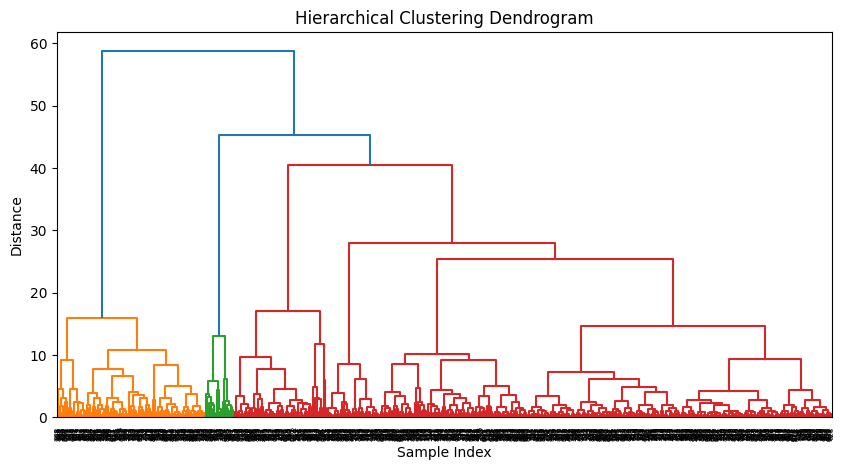

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

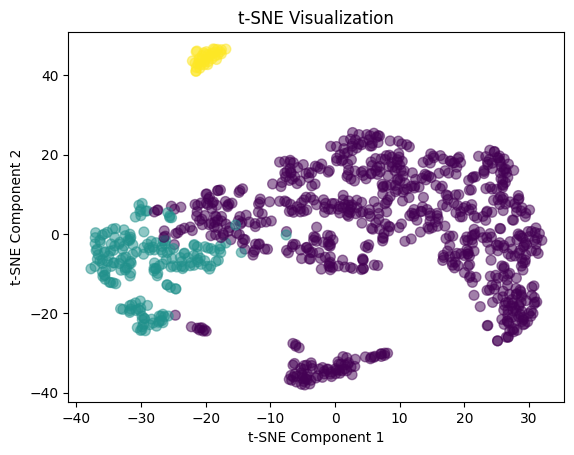

In [51]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Plot t-SNE visualization
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels,
            cmap='viridis', s=50, alpha=0.5)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [52]:
df_clean.groupby('cluster').mean()

,year,transmission,condition,odometer,mmr,sellingprice
cluster,,,,,,
0,2011.709468,1.0,33.588846,47190.798962,16664.169909,16704.937743
1,2004.343750,1.0,20.661458,138583.005208,4272.786458,3832.552083
2,2009.351351,0.0,30.675676,67629.918919,12296.621622,11920.270270
